In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [10]:
data = pd.read_csv('../Data/RELIANCE.csv', parse_dates=['Date'], index_col='Date')

In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477992,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396509,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475443,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378685,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307389,76935930
...,...,...,...,...,...,...
2022-09-14,2575.000000,2610.000000,2572.750000,2588.350098,2588.350098,4004997
2022-09-15,2583.000000,2603.550049,2556.750000,2562.699951,2562.699951,4783723
2022-09-16,2543.750000,2553.000000,2491.000000,2499.199951,2499.199951,9330469


<AxesSubplot:xlabel='Date'>

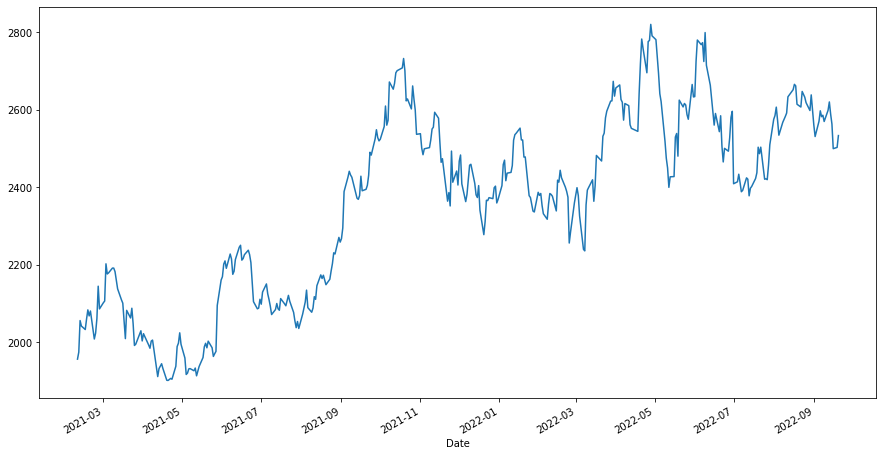

In [17]:
data[-400:].Close.plot(figsize =(15,8))

## Golden Crossover

20 SMA cross karta hai 50 SMA 
Then we get a buy signal and 
when 50 SMA cross karega 20 sma we get sell signal

In [20]:
data['20_SMA'] = data.Close.rolling(window=20, min_periods=1).mean()
data['50_SMA'] = data.Close.rolling(window=50, min_periods=1).mean()


In [25]:
data['Signal'] = 0
data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)

In [27]:
data['Position'] = data.Signal.diff()

In [28]:
data['Position']

Date
1996-01-01    NaN
1996-01-02    0.0
1996-01-03    0.0
1996-01-04    0.0
1996-01-05    0.0
             ... 
2022-09-14    0.0
2022-09-15    0.0
2022-09-16    0.0
2022-09-19    0.0
2022-09-20    0.0
Name: Position, Length: 6720, dtype: float64

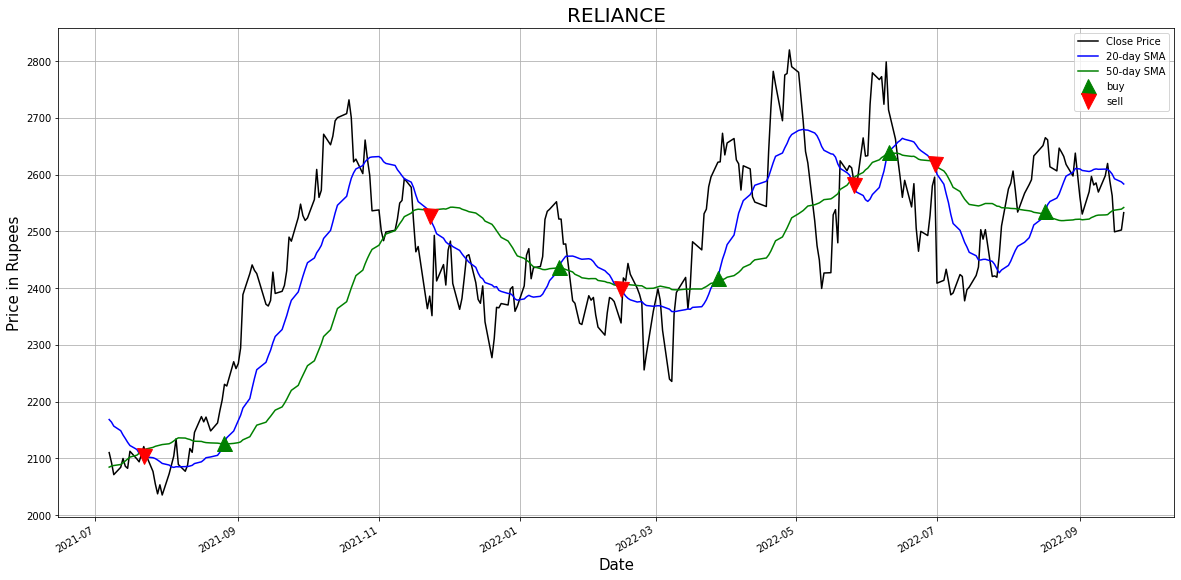

In [30]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data.iloc[-300:]['Close'].plot(color = 'k', label= 'Close Price') 
data.iloc[-300:]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
data.iloc[-300:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == 1].index, 
         data.iloc[-300:]['20_SMA'][data.iloc[-300:]['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == -1].index, 
         data.iloc[-300:]['20_SMA'][data.iloc[-300:]['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('RELIANCE', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [38]:
df_pos = data.iloc[-200:][(data.iloc[-200:]['Position'] == 1) | (data['Position'] == -1)].copy()
df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2022-01-18 00:00:00 | 2521.8  | Buy        |
| 2022-02-14 00:00:00 | 2338.55 | Sell       |
| 2022-03-28 00:00:00 | 2621.95 | Buy        |
| 2022-05-26 00:00:00 | 2587.1  | Sell       |
| 2022-06-10 00:00:00 | 2714.25 | Buy        |
| 2022-06-30 00:00:00 | 2595.65 | Sell       |
| 2022-08-17 00:00:00 | 2665.15 | Buy        |
+---------------------+---------+------------+


<ipython-input-38-3d4a82f7fa8e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-200:][(data.iloc[-200:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [41]:
def GoldenCrossverSignal(name, data_point):
    path = f'../Data/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
    data['20_SMA'] = data.Close.rolling(window=20, min_periods=1).mean()
    data['50_SMA'] = data.Close.rolling(window=50, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)
    data['Position'] = data.Signal.diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    data.iloc[-data_point:]['Close'].plot(color = 'k', label= 'Close Price') 
    data.iloc[-data_point:]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
    data.iloc[-data_point:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot ‘buy’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == 1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == -1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

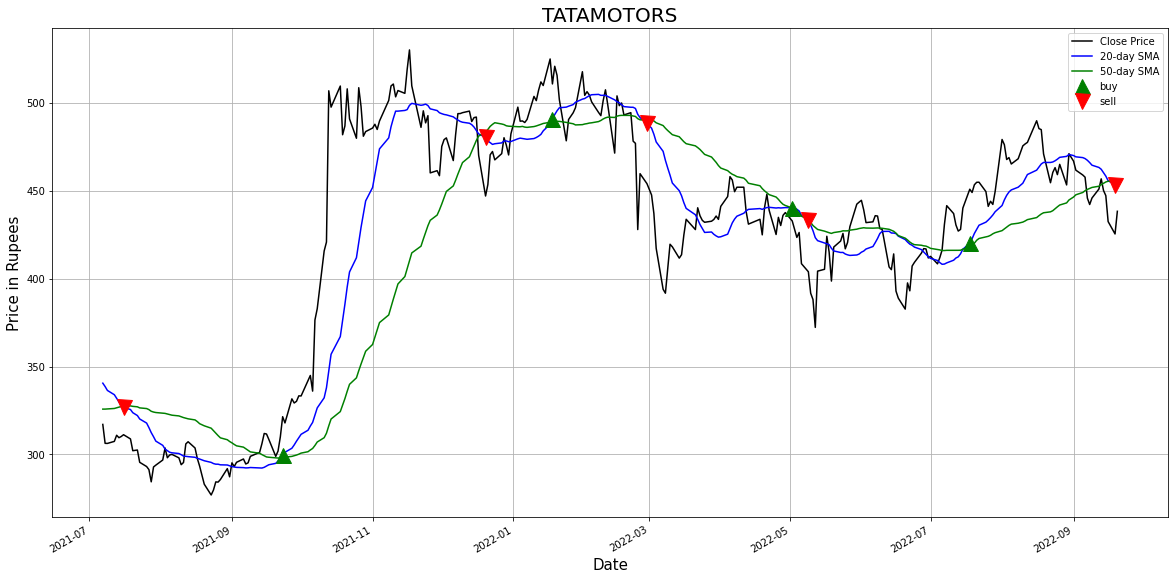

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2021-07-16 00:00:00 |  311.25 | Sell       |
| 2021-09-23 00:00:00 |  321.5  | Buy        |
| 2021-12-20 00:00:00 |  447.05 | Sell       |
| 2022-01-18 00:00:00 |  510.8  | Buy        |
| 2022-02-28 00:00:00 |  454.05 | Sell       |
| 2022-05-02 00:00:00 |  432.85 | Buy        |
| 2022-05-09 00:00:00 |  403.95 | Sell       |
| 2022-07-18 00:00:00 |  450.9  | Buy        |
| 2022-09-19 00:00:00 |  425.45 | Sell       |
+---------------------+---------+------------+


<ipython-input-41-44a7acae176c>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [60]:
GoldenCrossverSignal('TATAMOTORS', 300)